# Named Entity Recognition
This is a notebook dedicated to recognizing parts of speech from the GTD database.

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag
import pandas as pd

### Download necessary libraries

In [16]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/dread/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dread/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [4]:
df = pd.read_csv('../data.csv', encoding="latin-1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Preprocess sentence phrases
We need to tokenize each sentence and split it into words. Part of speech tag each word

In [19]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

# Language data associated with bombings/explosions

In [20]:
my_data = pd.DataFrame(df, columns=['attacktype1_txt', 'addnotes']).dropna()
my_data = my_data[my_data["attacktype1_txt"] == "Bombing/Explosion"]
my_data.head()

,attacktype1_txt,addnotes
7,Bombing/Explosion,"Damages were estimated to be between $20,000-$..."
17,Bombing/Explosion,"One half hour after the bomb explosion, an ano..."
22,Bombing/Explosion,Witnesses observed three African American male...
23,Bombing/Explosion,Judith and Silas Bissell were both members of ...
28,Bombing/Explosion,This attack might be linked with other episode...


## Testing Subsets of data
Take a small subset of the data and test the sentence concatination on a small scale

In [27]:
first_10 = my_data.head(2)
first_10

,attacktype1_txt,addnotes
7,Bombing/Explosion,"Damages were estimated to be between $20,000-$..."
17,Bombing/Explosion,"One half hour after the bomb explosion, an ano..."


In [28]:
def sentence_concatination(df):
    sent = ""
    for item in df["addnotes"]:
        sent += item
    return sent

In [31]:
sent = sentence_concatination(first_10)
result = preprocess(sent)

## Declare regular expression pattern 

In [32]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

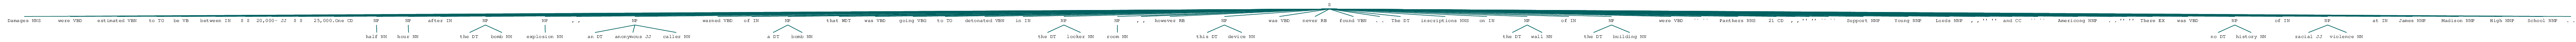

In [33]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(result)
cs